In [1]:
# from utils.import_list import *
from import_list import *
%matplotlib inline

In [2]:
def importData(data_name, train_percentage):
    data = Data(data_name)
    data.prepare_data(train_percentage)
    return data
data_name, train_percentage = "MNIST_dataset.csv", .009
data = importData(data_name, train_percentage)

In [3]:
arc = LeNet5()
epoch = 120
for i in range(epoch+ 1):
    input = data.x_train.reshape(data.x_train.shape[0], 1, int(np.sqrt(data.x_train.shape[1])), int(np.sqrt(data.x_train.shape[1])))
    arc.forward_feed(input)
    arc.backward_feed(data.y_train_vector)
    arc.update_params()
    data.prepare_data(train_percentage)
    test_x, test_y = data.x_test[:1000], data.y_test_vector[:1000]
    if i % 5 == 0:
        printStmt = arc.printStatement(i, epoch)
        if arc.compute_cost() <= 0.17:
            print(arc.printStatement(i, epoch))
            break
        accur = arc.get_accuracy(test_x, test_y)
        print(printStmt, " Testing ", accur)
        # print(arc.get_accuracy(test_x, test_y))
        # print("Testing", arc.printTestStatement(i, epoch, test_x, test_y))
        # if i != 0:
        # print("Test accuracy: ", arc.get_accuracy(test_x, test_y))
        # print(arc.printTestStatement(i, epoch, data.x_test[:1], data.y_test_vector[:1]))

    

Loss :9.03200114988106; Accuracy: 0.09018567639257294; Cost :2.3351094725939667; 0 / 120  Testing  0.094
Loss :8.193568602868996; Accuracy: 0.363395225464191; Cost :1.71123179768057; 5 / 120  Testing  0.164
Loss :7.298163919035856; Accuracy: 0.5464190981432361; Cost :1.3086535211126629; 10 / 120  Testing  0.316
Loss :6.484175162246748; Accuracy: 0.7108753315649867; Cost :1.0453109330260821; 15 / 120  Testing  0.442
Loss :5.551663415816617; Accuracy: 0.753315649867374; Cost :0.8100548680041254; 20 / 120  Testing  0.49
Loss :4.937469718694245; Accuracy: 0.7851458885941645; Cost :0.6807186790867824; 25 / 120  Testing  0.51
Loss :4.413228347103023; Accuracy: 0.843501326259947; Cost :0.5821834945001294; 30 / 120  Testing  0.543
Loss :4.103315907740607; Accuracy: 0.7931034482758621; Cost :0.5281949183349538; 35 / 120  Testing  0.536
Loss :4.066487281729748; Accuracy: 0.7984084880636605; Cost :0.5219686914048016; 40 / 120  Testing  0.557
Loss :3.558432667640828; Accuracy: 0.8275862068965517; 

In [7]:
pickle.dump(arc, open("final_network.py", "wb"))

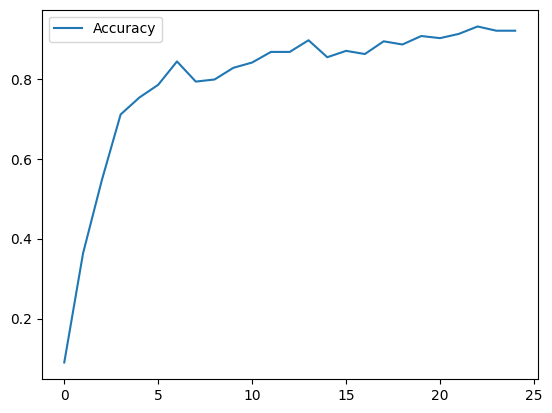

In [5]:
x = arc.accuracy_list
plt.plot(range(len(x)), x, label="Accuracy")
plt.legend()

In [50]:
arc.get_accuracy(data.x_test[:500], data.y_test_vector[:500])

0.762

prediction
6


6

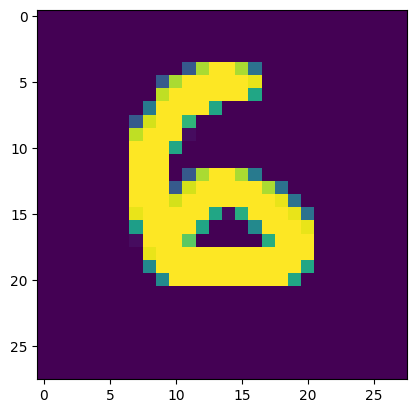

In [8]:
from PIL import Image, ImageOps
img = Image.open("test.png")
img = ImageOps.grayscale(img)
img = np.asarray(img)
# pos10 = scipy.ndimage.rotate(img.reshape(1, 28, 28), 3, axes=(1, 2), reshape=False).reshape(28, 28)
img = 1 - img / 255.
plt.imshow((img))
arc.predict(img.reshape(1, 1, 28, 28))
